###  Imported  required libraries

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [63]:
df = pd.read_csv(r'C:\Datasets\laptop_details.csv')

In [64]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [65]:
# !pip install skimpy

###  Understand the data

In [66]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 720    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA     ┃ NA %     ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Rating              │    140 │       19 │     4.3 │    0.28 │    3 │    4.2 │    4.5 │       5 │    ▁█▄▂   │  │
│ └─────────────────────┴────────┴──────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product                   │       0 │          0 │                           19 │                    13000 │  │
│ │ MRP                       │       0 │          0 │                           19 │                    13000 │  │
│ │ Feature                   │       0 │          0 │                           19 │                    13000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [68]:
df.shape

(720, 4)

In [69]:
df.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [70]:
np.round((df.isna().sum()/len(df))*100,2).astype(str) + '%'

Product      0.0%
Rating     19.31%
MRP          0.0%
Feature      0.0%
dtype: object

### Feature Extraction

### Extract processor

In [71]:
df['Feature'].apply(lambda x:x[:10]).unique()

array(['Intel Core', 'AMD Ryzen ', 'Processor:', 'Stylish & ',
       'Apple M1 P', 'Intel Cele', 'Free upgra', 'AMD Athlon',
       'Powered by', 'Apple M2 P', 'Qualcomm S', 'NVIDIA RTX',
       'Apple M1 M', 'Pre-instal', 'Intel Pent', '15.6 inche',
       'AMD Dual C', 'NVIDIA GeF', 'First Ever', 'NVIDIA Gef'],
      dtype=object)

In [72]:
regex = r'((?:AMD|Intel|Apple|Qualcomm)[\s\w]+)Processor'
df['Processor']=df['Feature'].apply(lambda x :re.findall(regex,x,flags=re.I)[0] if re.search(regex,x,flags=re.I) else np.nan).str.strip()

In [73]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5


In [74]:
df['Processor'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel OptaneIntel Core i3', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'Intel Celeron Quad Core', 'Intel Core i7', 'Apple M1 Pro',
       'Qualcomm Snapdragon 7c Gen 2', 'Intel Pentium Silver',
       'Apple M1 Max', 'Intel Core i9', 'AMD Ryzen 5 Dual Core',
       'Intel Pentium Quad Core', 'AMD Dual Core',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

### Extract Ram(GB) 

In [75]:
regex=r'(\d+\s)+GB+[\s\w]+RAM'
df['RAM_GB'] = df['Feature'].apply(lambda x : re.findall(regex,x)[0] if re.search(regex,x) else np.nan).str.strip().astype(int)

###  Extract Ram type 

In [76]:
regex=r'\d+\s+GB\s*(DDR4|DDR5|LPDDR4X|LPDDR5|LPDDR4|LPDDR3|Unified Memory)\s*RAM'
df['RAM_Type'] = df['Feature'].apply(lambda x : re.findall(regex,x)[0] if re.search(regex,x) else np.nan).str.strip()

In [77]:
df['RAM_Type'].value_counts(dropna=False)

DDR4              561
DDR5               92
LPDDR4X            37
Unified Memory     12
LPDDR5              9
LPDDR4              8
LPDDR3              1
Name: RAM_Type, dtype: int64

In [78]:
df['RAM_GB'].value_counts()

8      402
16     263
4       37
32      17
128      1
Name: RAM_GB, dtype: int64

### Extract CPU(bit)

In [79]:
df['CPU_bit']=df['Feature'].apply(lambda x :re.findall(r'(\d+)\s*bit',x)[0] if re.search(r'(\d+)\s*bit',x) else np.nan).str.strip()

In [80]:
df['CPU_bit'].value_counts()

64    524
32      1
Name: CPU_bit, dtype: int64

In [81]:
df['CPU_bit']=df['CPU_bit'].fillna('64').astype(int)

In [82]:
pd.set_option('display.width',None)

### Extract Operating System 

In [83]:
reg=r'((Windows|Chrome|Mac|DOS)\s*\d*\s*\w*)\s*Operating'
df['OS']=df['Feature'].apply(lambda x:re.findall(reg,x,flags=re.I)[0][0] if re.search(reg,x,flags=re.I) else np.nan).str.strip()
df['OS']=df['OS'].str.strip()

In [84]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11


In [85]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS', 'Chrome'],
      dtype=object)

### Extract  Screen size in cm

In [86]:
regex = r'([0-9.\s]+)cm'
df['Screen_size_cm']=df['Feature'].apply(lambda x :re.findall(regex,x)[0] if re.search(regex,x) else np.nan).str.strip().astype(float)

In [87]:
df['Screen_size_cm'].replace(88.9,35.56,inplace=True)

In [88]:
df['Screen_size_cm'].unique()

array([35.56, 39.62, 43.94, 33.78, 36.07, 34.54, 40.64, 40.89, 41.15,
       35.81, 34.04, 29.46, 38.1 , 33.02, 38.  , 34.29, 42.16])

In [89]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11,39.62


In [90]:
df.isna().sum()

Product             0
Rating            139
MRP                 0
Feature             0
Processor           0
RAM_GB              0
RAM_Type            0
CPU_bit             0
OS                  0
Screen_size_cm      0
dtype: int64

### Extract storage capacity(SSD)

In [91]:
regex = r'([\d]+)\s(?:GB|TB)\s(?:SSD)'
df['Storage_Capacity_SSD_GB']=df['Product'].apply(lambda x :re.findall(regex,x)[0] if re.search(regex,x) else 0).astype(float)

### Extract storage capacity(HHD)

In [92]:
regex = r'([\d]+)\s(?:GB|TB)\s(?:HDD)'
df['Storage_Capacity_HDD_GB']=df['Product'].apply(lambda x :re.findall(regex,x)[0] if re.search(regex,x) else 0).astype(float)

###  Extract storage capacity(EMMC)

In [93]:
regex = r'([\d]+)\s(?:GB|TB)\s(?:EMMC)'
df['Storage_Capacity_EMMC_GB']=df['Product'].apply(lambda x :re.findall(regex,x)[0] if re.search(regex,x) else 0).astype(float)

In [94]:
# Converting it into GB
df['Storage_Capacity_HDD_GB']=df['Storage_Capacity_HDD_GB'].apply(lambda x:x*1024 if x<5 else x)
df['Storage_Capacity_HDD_GB'].unique()

array([   0., 1024.,  256.])

In [95]:
# Converting it into GB
df['Storage_Capacity_SSD_GB']=df['Storage_Capacity_SSD_GB'].apply(lambda x:x*1024 if x<5 else x)
df['Storage_Capacity_SSD_GB'].unique()

array([ 256.,  512., 1024.,    0.,  128., 2048.])

In [96]:
# Converting it into GB
df['Storage_Capacity_EMMC_GB']=df['Storage_Capacity_EMMC_GB'].apply(lambda x:x*1024 if x<5 else x)
df['Storage_Capacity_EMMC_GB'].unique()

array([  0., 128.,  64.,  32.])

In [97]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,35.56,256.0,0.0,0.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62,512.0,0.0,0.0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0


In [98]:
df.isna().sum()

Product                       0
Rating                      139
MRP                           0
Feature                       0
Processor                     0
RAM_GB                        0
RAM_Type                      0
CPU_bit                       0
OS                            0
Screen_size_cm                0
Storage_Capacity_SSD_GB       0
Storage_Capacity_HDD_GB       0
Storage_Capacity_EMMC_GB      0
dtype: int64

### Extract Brand 

In [99]:
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x :re.findall(regex,x,flags=re.I)[0] if re.search(regex,x,flags=re.I) else np.nan).str.strip()

In [100]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [101]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,35.56,256.0,0.0,0.0,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62,512.0,0.0,0.0,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS


In [102]:
df[df['Product'].str.contains('raphics')]

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62,512.0,0.0,0.0,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS
10,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹59,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,HP
18,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5-5600H - ...,4.4,"₹47,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,MSI
19,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,4.6,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...,AMD Ryzen 7 Octa Core,16,DDR4,64,Windows 11,39.62,1024.0,0.0,0.0,ASUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,ASUS Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,"₹92,990",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,Intel Core i5,16,DDR5,64,Windows 11,39.62,512.0,0.0,0.0,ASUS
707,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,4.6,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...,AMD Ryzen 7 Octa Core,16,DDR4,64,Windows 11,39.62,1024.0,0.0,0.0,ASUS
709,ASUS ROG Flow X13 (2022) Ryzen 9 Octa Core 690...,NaN,"₹1,51,990",AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...,AMD Ryzen 9 Octa Core,16,LPDDR5,64,Windows 11,34.04,1024.0,0.0,0.0,ASUS
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Octa Core,16,DDR4,64,Windows 10,39.62,512.0,0.0,0.0,HP


###  Extract Graphics(GB)

In [103]:
reg=r'(\d+)(?=\s*GB\s*Graphics)'
df['Graphics_capa_GB']=df['Product'].apply(lambda x:re.findall(reg,x,flags=re.I)[0] if re.search(reg,x,flags=re.I) else 0.5).astype(float)

### Extract Years Waranty 

In [104]:
reg=r'(\d)\s*(?=Year)|(\d{2})\s*(?=month)'
df['Years_warranty']=df['Feature'].apply(lambda x:re.findall(reg,x,flags=re.I)[0] if re.search(reg,x,flags=re.I) else np.nan).astype(str)

In [105]:
df['Years_warranty'].unique()

array(["('2', '')", "('1', '')", "('3', '')", "('', '12')"], dtype=object)

In [106]:
df['Years_warranty']=df['Years_warranty'].apply(lambda x:re.findall(r'\d+',x)[0] if re.search(r'\d+',x) else np.nan).astype(int)

In [107]:
df['Years_warranty']=df['Years_warranty'].apply(lambda x:x//12 if x>5 else x)


In [108]:
df['Years_warranty'].value_counts()

1    552
2    160
3      8
Name: Years_warranty, dtype: int64

In [109]:
df['Graphics_capa_GB'].value_counts(dropna=False)

0.5     531
4.0     122
8.0      32
6.0      24
2.0       8
16.0      3
Name: Graphics_capa_GB, dtype: int64

#### Removing '₹'&, in MRP column 

In [110]:
df['MRP']=df['MRP'].replace(r'[₹,]','',regex=True).astype(float)

In [111]:
df['MRP']

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
715     23490.0
716     73490.0
717    194990.0
718    125990.0
719     50990.0
Name: MRP, Length: 720, dtype: float64

In [112]:
df

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,35.56,256.0,0.0,0.0,Lenovo,0.5,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,Lenovo,0.5,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS,0.5,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62,512.0,0.0,0.0,HP,4.0,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4,LPDDR4,64,Chrome,29.46,0.0,0.0,64.0,ASUS,0.5,1
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,Lenovo,0.5,1
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990.0,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core,16,DDR5,64,Windows 11,39.62,1024.0,0.0,0.0,ASUS,8.0,1
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990.0,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7,16,LPDDR5,64,Windows 11,35.56,512.0,0.0,0.0,ASUS,0.5,1


In [113]:
#checking rating column median with respect to brand by using group by
s=df.groupby(['Brand'])['Rating'].median().to_frame().reset_index()
s['Rating']=s['Rating'].astype(str)

In [114]:
s

,Brand,Rating
0,ALIENWARE,4.6
1,APPLE,4.7
2,ASUS,4.5
3,DELL,4.2
4,GIGABYTE,nan
5,HP,4.3
6,Infinix,4.2
7,Lenovo,4.2
8,MSI,4.5
9,Nokia,4.4


In [115]:
df['Rating']=df['Rating'].astype(str)

In [116]:
s[s['Brand']=='ASUS']['Rating'].values[0]

'4.5'

In [117]:
# replacing nan values with median with respect to brand
rate=[]
for i in range(len(df)):
    if df['Rating'][i]!='nan':
        rate.append(df['Rating'][i])
    elif df['Rating'][i]=='nan':
        rate.append(s[s['Brand']==df['Brand'][i]]['Rating'].values[0])


In [118]:
df['Ratings']=rate

In [119]:
df[df['Ratings']=='nan']

,Product,Rating,MRP,Feature,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty,Ratings
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,nan,15990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4,LPDDR4,64,DOS,35.81,128.0,0.0,0.0,Ultimus,0.5,1,nan
392,GIGABYTE G5 GD Core i5 11th Gen - (16 GB/512 G...,nan,73990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5,16,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,GIGABYTE,4.0,2,nan
535,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,nan,19990.0,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4,LPDDR4,64,Windows 11,35.81,128.0,0.0,0.0,Ultimus,0.5,1,nan


In [120]:
df['Rating']=df['Rating'].astype(float)

In [121]:
df['Ratings']=df['Ratings'].astype(float)

In [122]:
df.Ratings.fillna(df.Rating.min(),inplace=True)

In [123]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Processor', 'RAM_GB',
       'RAM_Type', 'CPU_bit', 'OS', 'Screen_size_cm',
       'Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB', 'Brand', 'Graphics_capa_GB',
       'Years_warranty', 'Ratings'],
      dtype='object')

In [124]:
df.rename(columns={'MRP':'Price'},inplace=True)

In [125]:
df.columns

Index(['Product', 'Rating', 'Price', 'Feature', 'Processor', 'RAM_GB',
       'RAM_Type', 'CPU_bit', 'OS', 'Screen_size_cm',
       'Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB', 'Brand', 'Graphics_capa_GB',
       'Years_warranty', 'Ratings'],
      dtype='object')

In [126]:
# dropping unwanted columns
drop_list =['Product', 'Rating','Feature']
df.drop(drop_list,axis=1,inplace=True)

In [127]:
df.head()

,Price,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty,Ratings
0,36990.0,Intel Core i3,8,DDR4,64,Windows 11,35.56,256.0,0.0,0.0,Lenovo,0.5,2,4.2
1,39990.0,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,Lenovo,0.5,2,4.2
2,32990.0,Intel Core i3,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS,0.5,1,4.3
3,49990.0,AMD Ryzen 5 Hexa Core,8,DDR4,64,Windows 10,39.62,512.0,0.0,0.0,HP,4.0,1,4.4
4,49990.0,Intel Core i5,8,DDR4,64,Windows 11,39.62,512.0,0.0,0.0,ASUS,4.0,1,4.4


In [5]:
df.columns

Index(['Price', 'Processor', 'RAM_GB', 'RAM_Type', 'CPU_bit', 'OS',
       'Screen_size_cm', 'Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB', 'Brand', 'Graphics_capa_GB',
       'Years_warranty', 'Ratings'],
      dtype='object')

# EDA 

## Univariate Analysis 

### Brand

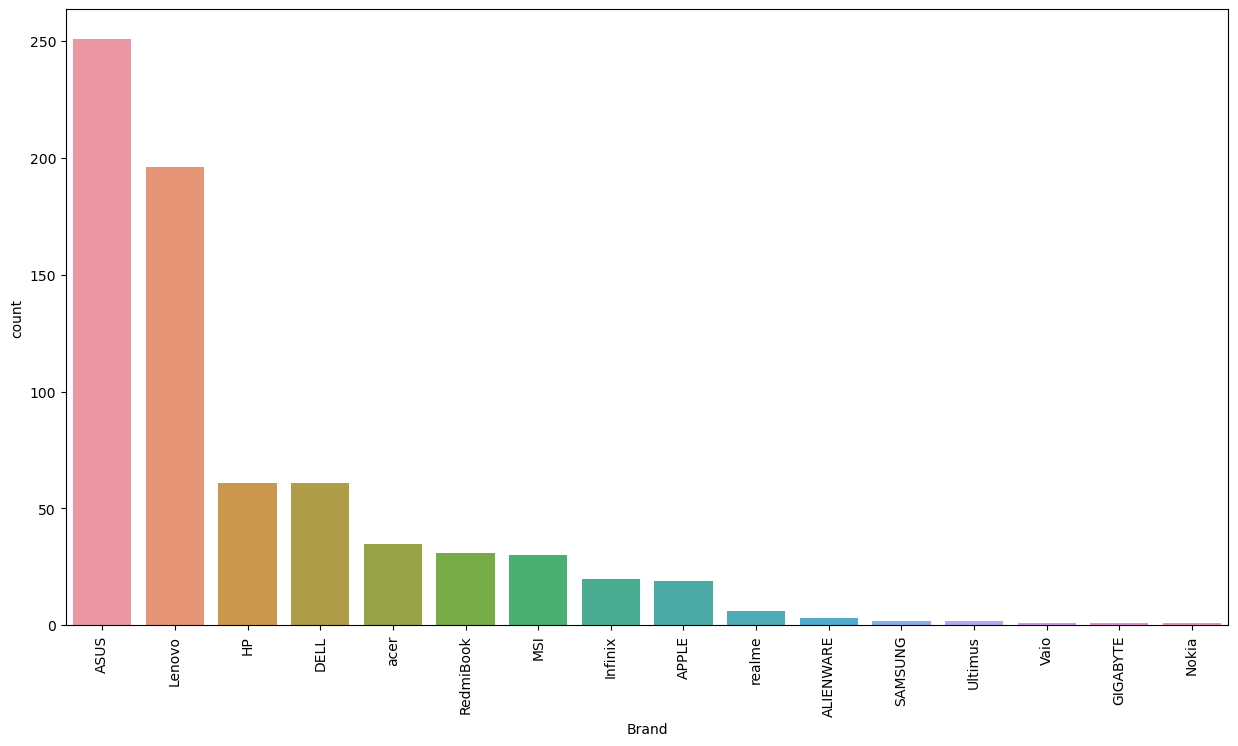

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(df.Brand,order =df['Brand'].value_counts().index)
plt.xticks(rotation=90);


### Insights
**Asus Laptop are more in number**

### Processor 

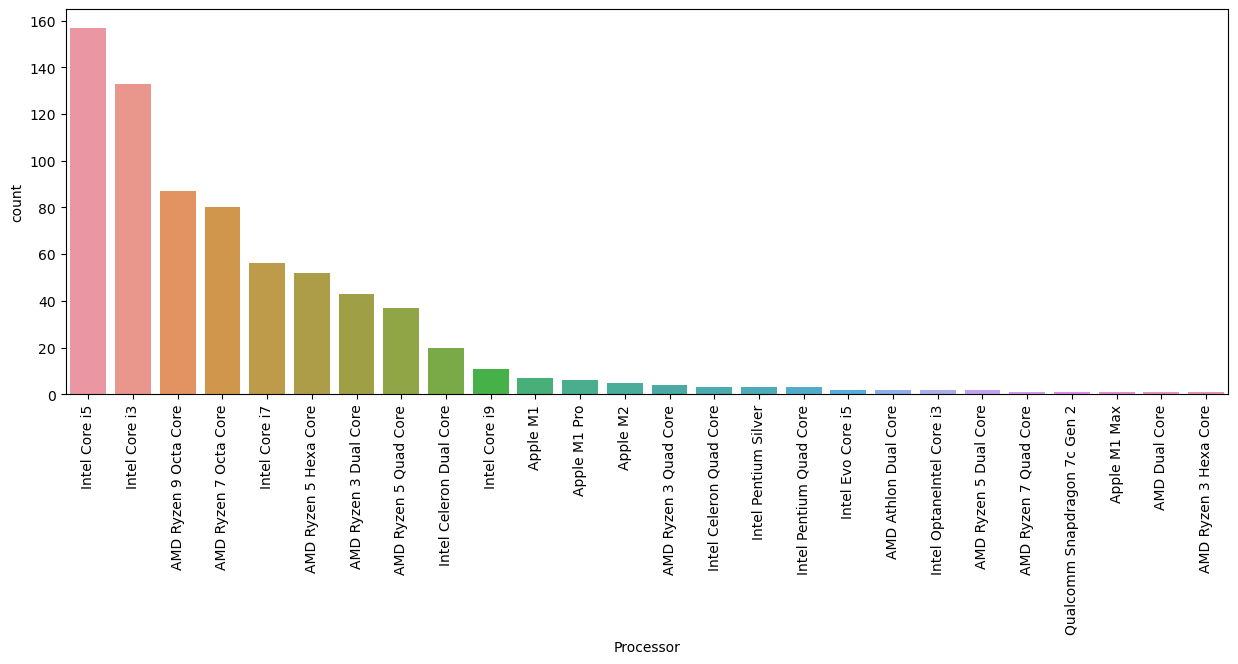

In [1557]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Processor',
              data = df,
              order =df['Processor'].value_counts().index)
plt.xticks(rotation=90);

### Insights:

**Intel core i5 and Intel core i3 processors are widely available**

### Screen sizei in cm

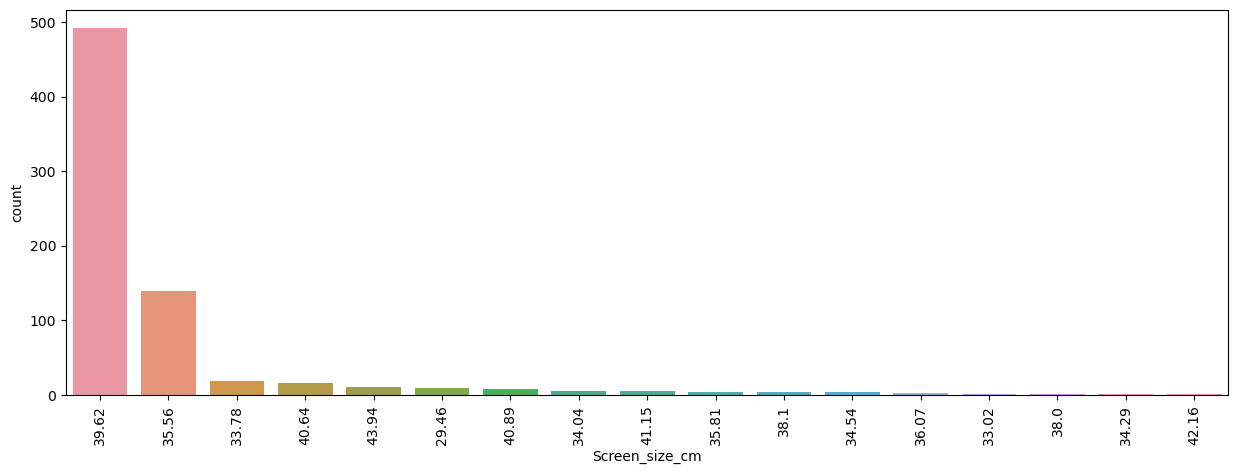

In [1558]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Screen_size_cm',
              data = df,
              order =df['Screen_size_cm'].value_counts().index)
plt.xticks(rotation=90);

### Insights:
**Most of the laptops are having screen size of 39.62 cm**

### Graphics capa GB

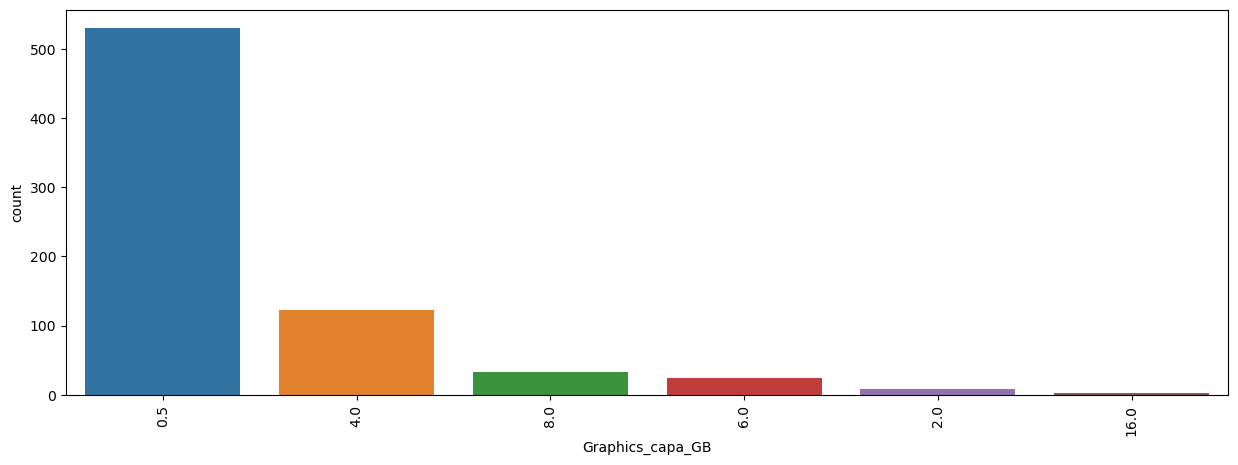

In [1559]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Graphics_capa_GB',
              data = df,
              order =df['Graphics_capa_GB'].value_counts().index)
plt.xticks(rotation=90);

In [10]:
# sns.boxplot(x=df['Graphics_capa_GB'],y=df['Price'])

In [9]:
# sns.boxplot(x=df['Storage_Capacity_SSD_GB'],y=df['Price'])

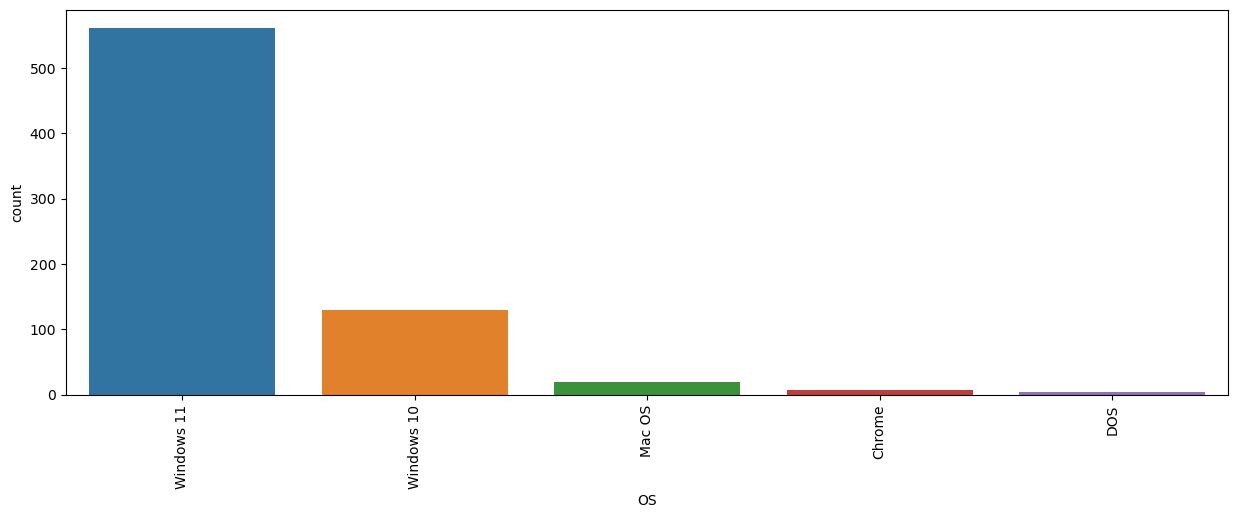

In [1562]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'OS',
              data = df,
              order =df['OS'].value_counts().index)
plt.xticks(rotation=90);

### Insights:
**windows11 operating system is widely available**

### Years_warranty

<AxesSubplot:xlabel='Years_warranty', ylabel='count'>

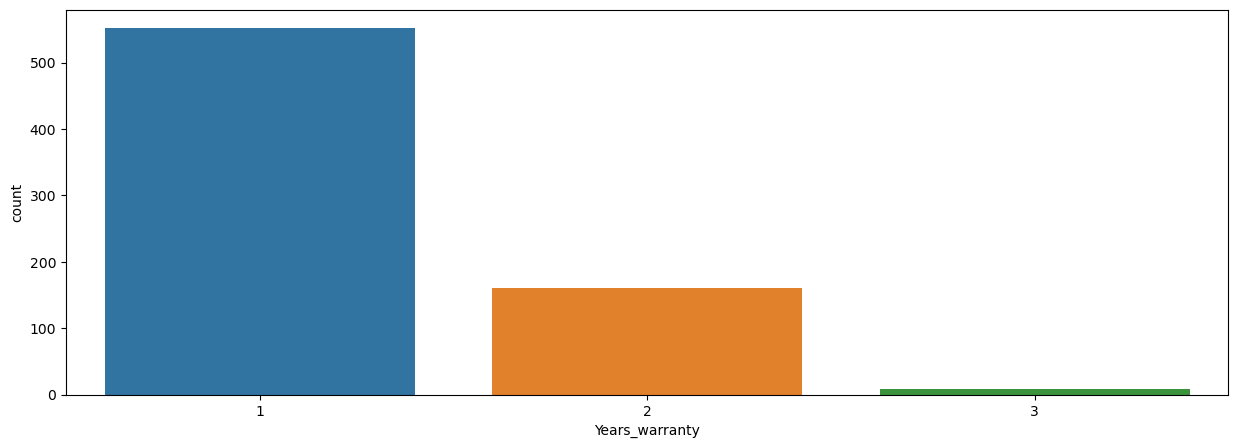

In [1563]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Years_warranty',
              data = df,
              order =df['Years_warranty'].value_counts().index);

### Insights:
**Most of laptops are providing one year warranty**

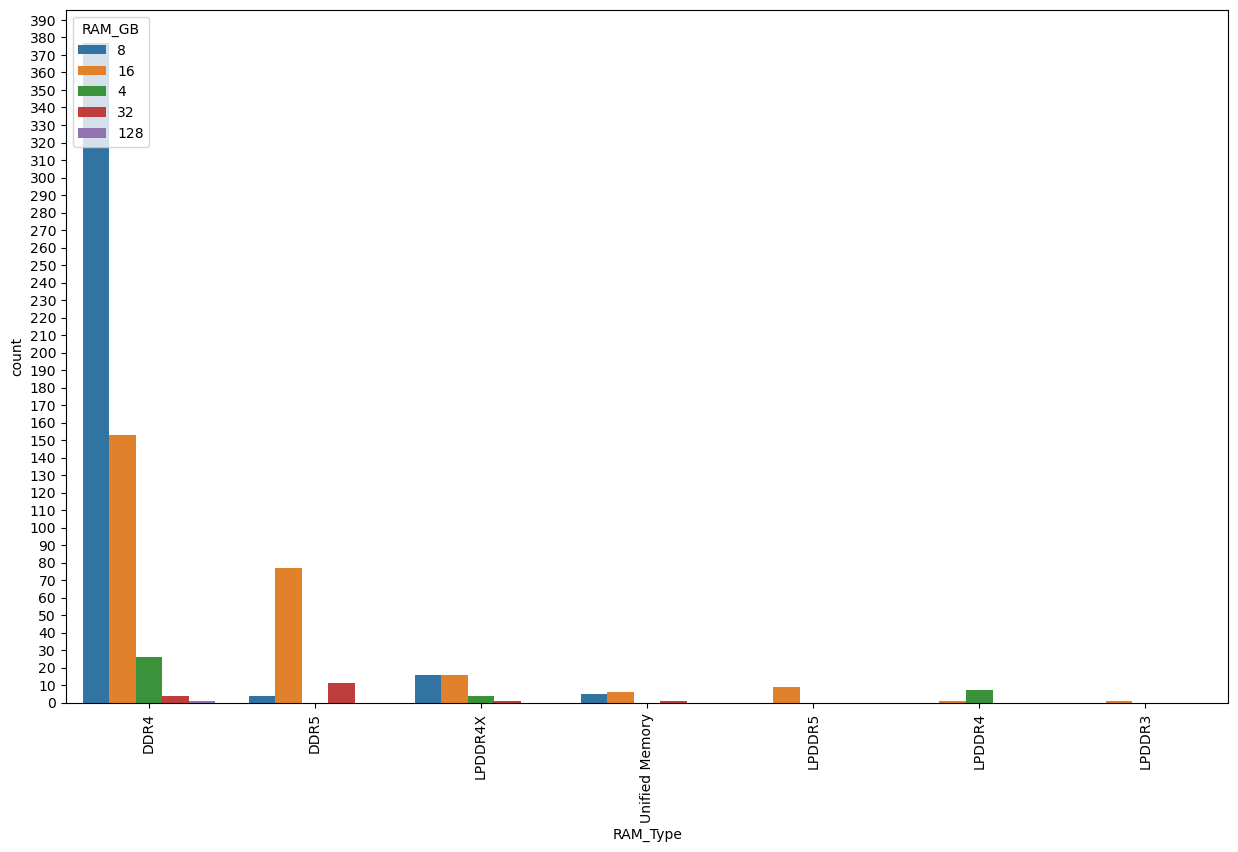

In [1564]:
plt.figure(figsize=(15,9))
sns.countplot(x = 'RAM_Type',
              data = df,
              order =df['RAM_Type'].value_counts().index,hue='RAM_GB',hue_order=df['RAM_GB'].value_counts().index)
plt.xticks(rotation=90);
plt.yticks([*range(0,400,10)]);

### Insights:
**Laptops with 8GB RAM and RAM type DDR4are more**

## Bivariate Analysis 

<AxesSubplot:xlabel='Brand'>

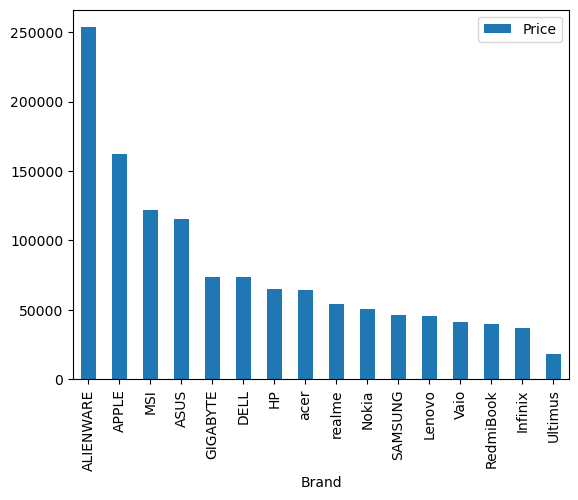

In [1565]:
df.groupby('Brand')['Price'].mean().to_frame().sort_values(by='Price',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Brand'>

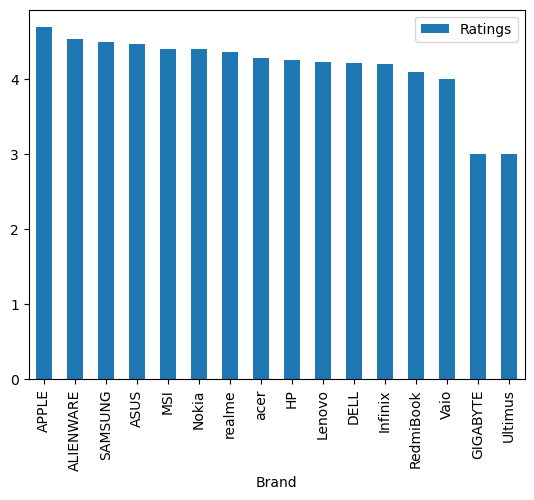

In [1566]:
df.groupby('Brand')['Ratings'].mean().to_frame().sort_values(by='Ratings',ascending=False).plot(kind='bar')

In [1568]:
df.to_csv('C:\Data\laptop_data.csv',index=False)

In [39]:
# df1=pd.read_csv(r'C:\Data\laptop_data.csv')
# df1.drop(['Brand','Ratings'],axis=1,inplace=True)

In [3]:
# df=pd.read_csv(r'C:\Data\laptop_data.csv')

## Categorical Encoding 

In [188]:
df['RAM_GB']=df['RAM_GB'].replace({4:1,8:2,16:3,32:4,128:5})

In [189]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'Mac OS', 'DOS', 'Chrome'],
      dtype=object)

In [190]:
df.groupby(['OS'])['Price'].median().to_frame().sort_values(by='Price',ascending=False)

,Price
OS,
Mac OS,139990.0
Windows 10,62190.0
Windows 11,52990.0
DOS,27740.0
Chrome,23490.0


In [191]:
df['OS']=df['OS'].replace({'Chrome':1,'DOS':2,'Windows 10':3,'Windows 11':4,'Mac OS':5})

In [192]:
t=sorted(df['Storage_Capacity_SSD_GB'].unique())
s=dict(zip(t,range(1,len(t)+1)))
print(s)
df['Storage_Capacity_SSD(GB)']=df['Storage_Capacity_SSD(GB)'].replace(s)

{0.0: 1, 128.0: 2, 256.0: 3, 512.0: 4, 1024.0: 5, 2048.0: 6}

In [194]:
t=sorted(df['Storage_Capacity_HDD_GB'].unique())
q=dict(zip(t,range(1,len(t)+1)))
print(q)
df['Storage_Capacity_HDD_GB']=df['Storage_Capacity_HDD_GB'].replace(q)

{0.0: 1, 256.0: 2, 1024.0: 3}


In [ ]:
t=sorted(df['gender'].unique())
s=dict(zip(t,range(1,lent(t)+1)))
df['gender']=df['gender'].replace(s)

In [195]:
t=sorted(df['Storage_Capacity_EMMC_GB'].unique())
p=dict(zip(t,range(1,len(t)+1)))
print(p)
df['Storage_Capacity_EMMC_GB']=df['Storage_Capacity_EMMC_GB'].replace(p)

{0.0: 1, 32.0: 2, 64.0: 3, 128.0: 4}


In [197]:
df['RAM_Type'].value_counts()

DDR4              561
DDR5               92
LPDDR4X            37
Unified Memory     12
LPDDR5              9
LPDDR4              8
LPDDR3              1
Name: RAM_Type, dtype: int64

In [198]:
df.groupby(['RAM_Type'])['Price'].median().to_frame().sort_values(by='Price',ascending=False)

,Price
RAM_Type,
LPDDR3,233990.0
Unified Memory,202490.0
DDR5,196990.0
LPDDR5,119990.0
DDR4,47990.0
LPDDR4X,46990.0
LPDDR4,21740.0


In [199]:
df['RAM_Type']=df['RAM_Type'].replace({'LPDDR4':1,'LPDDR4X':2,'DDR4':3,'LPDDR5':4,'DDR5':5,'Unified Memory':6,'LPDDR3':7})

In [200]:
df.head()

,Price,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty,Ratings
0,36990.0,Intel Core i3,2,3,64,4,35.56,3.0,1.0,1.0,Lenovo,0.5,2,4.2
1,39990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,Lenovo,0.5,2,4.2
2,32990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,0.5,1,4.3
3,49990.0,AMD Ryzen 5 Hexa Core,2,3,64,3,39.62,4.0,1.0,1.0,HP,4.0,1,4.4
4,49990.0,Intel Core i5,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,4.0,1,4.4


In [204]:
df['Screen_size_cm'].min(),df['Screen_size_cm'].max()

(29.46, 43.94)

In [205]:
df['Screen_size_cm_cat']=pd.cut(df['Screen_size_cm'],bins=[*range(28,45,2)],labels=['(28, 30]','(30, 32]','(32, 34]','(34, 36]','(36, 38]','(38, 40]','(40, 42]','(42, 44]'])

In [206]:
df.groupby(['Screen_size_cm_cat'])['Price'].median().to_frame().sort_values(by='Price',ascending=False)

,Price
Screen_size_cm_cat,
"(36, 38]",181990.0
"(40, 42]",157990.0
"(42, 44]",109990.0
"(32, 34]",94990.0
"(38, 40]",59990.0
"(34, 36]",42290.0
"(28, 30]",23490.0
"(30, 32]",NaN


In [207]:
t=[*range(28,45,2)]
[*zip(t,t[1:])]

[(28, 30),
 (30, 32),
 (32, 34),
 (34, 36),
 (36, 38),
 (38, 40),
 (40, 42),
 (42, 44)]

In [1365]:
df.head()

,Price,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty,Ratings,Screen_size_cm_cat
0,36990.0,Intel Core i3,2,3,64,4,35.56,3.0,1.0,1.0,Lenovo,0.5,2,4.2,"(34, 36]"
1,39990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,Lenovo,0.5,2,4.2,"(38, 40]"
2,32990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,0.5,1,4.3,"(38, 40]"
3,49990.0,AMD Ryzen 5 Hexa Core,2,3,64,3,39.62,4.0,1.0,1.0,HP,4.0,1,4.4,"(38, 40]"
4,49990.0,Intel Core i5,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,4.0,1,4.4,"(38, 40]"


In [1366]:
p=sorted(df['Graphics_capa_GB'].unique())
q=dict(zip(p,range(1,len(p)+1)))
df['Graphics_capa_GB']=df['Graphics_capa_GB'].replace(q)

In [1367]:
df['Years_warranty'].unique()

array([2, 1, 3], dtype=int64)

In [1368]:
df.head()

,Price,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Screen_size_cm,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Brand,Graphics_capa_GB,Years_warranty,Ratings,Screen_size_cm_cat
0,36990.0,Intel Core i3,2,3,64,4,35.56,3.0,1.0,1.0,Lenovo,1.0,2,4.2,"(34, 36]"
1,39990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,Lenovo,1.0,2,4.2,"(38, 40]"
2,32990.0,Intel Core i3,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,1.0,1,4.3,"(38, 40]"
3,49990.0,AMD Ryzen 5 Hexa Core,2,3,64,3,39.62,4.0,1.0,1.0,HP,3.0,1,4.4,"(38, 40]"
4,49990.0,Intel Core i5,2,3,64,4,39.62,4.0,1.0,1.0,ASUS,3.0,1,4.4,"(38, 40]"


In [1369]:
df.columns

Index(['Price', 'Processor', 'RAM_GB', 'RAM_Type', 'CPU_bit', 'OS',
       'Screen_size_cm', 'Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB', 'Brand', 'Graphics_capa_GB',
       'Years_warranty', 'Ratings', 'Screen_size_cm_cat'],
      dtype='object')

In [1370]:
drop_list =['Brand','Screen_size_cm','Ratings']
df.drop(drop_list,axis=1,inplace=True)

In [1371]:
df.columns

Index(['Price', 'Processor', 'RAM_GB', 'RAM_Type', 'CPU_bit', 'OS',
       'Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB', 'Graphics_capa_GB', 'Years_warranty',
       'Screen_size_cm_cat'],
      dtype='object')

In [1372]:
df.head()

,Price,Processor,RAM_GB,RAM_Type,CPU_bit,OS,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty,Screen_size_cm_cat
0,36990.0,Intel Core i3,2,3,64,4,3.0,1.0,1.0,1.0,2,"(34, 36]"
1,39990.0,Intel Core i3,2,3,64,4,4.0,1.0,1.0,1.0,2,"(38, 40]"
2,32990.0,Intel Core i3,2,3,64,4,4.0,1.0,1.0,1.0,1,"(38, 40]"
3,49990.0,AMD Ryzen 5 Hexa Core,2,3,64,3,4.0,1.0,1.0,3.0,1,"(38, 40]"
4,49990.0,Intel Core i5,2,3,64,4,4.0,1.0,1.0,3.0,1,"(38, 40]"


In [1373]:
df.shape

(720, 12)

In [1374]:
laptop_df=df[['Processor', 'RAM_GB','OS','CPU_bit',
       'RAM_Type','Storage_Capacity_SSD_GB', 'Storage_Capacity_HDD_GB',
       'Storage_Capacity_EMMC_GB','Graphics_capa_GB','Screen_size_cm_cat','Years_warranty','Price']]

In [1375]:
laptop_df.head()

,Processor,RAM_GB,OS,CPU_bit,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Screen_size_cm_cat,Years_warranty,Price
0,Intel Core i3,2,4,64,3,3.0,1.0,1.0,1.0,"(34, 36]",2,36990.0
1,Intel Core i3,2,4,64,3,4.0,1.0,1.0,1.0,"(38, 40]",2,39990.0
2,Intel Core i3,2,4,64,3,4.0,1.0,1.0,1.0,"(38, 40]",1,32990.0
3,AMD Ryzen 5 Hexa Core,2,3,64,3,4.0,1.0,1.0,3.0,"(38, 40]",1,49990.0
4,Intel Core i5,2,4,64,3,4.0,1.0,1.0,3.0,"(38, 40]",1,49990.0


In [1376]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Processor                 720 non-null    object  
 1   RAM_GB                    720 non-null    int64   
 2   OS                        720 non-null    int64   
 3   CPU_bit                   720 non-null    int64   
 4   RAM_Type                  720 non-null    int64   
 5   Storage_Capacity_SSD_GB   720 non-null    float64 
 6   Storage_Capacity_HDD_GB   720 non-null    float64 
 7   Storage_Capacity_EMMC_GB  720 non-null    float64 
 8   Graphics_capa_GB          720 non-null    float64 
 9   Screen_size_cm_cat        720 non-null    category
 10  Years_warranty            720 non-null    int64   
 11  Price                     720 non-null    float64 
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 63.1+ KB


In [1377]:
laptop_df.isna().sum()

Processor                   0
RAM_GB                      0
OS                          0
CPU_bit                     0
RAM_Type                    0
Storage_Capacity_SSD_GB     0
Storage_Capacity_HDD_GB     0
Storage_Capacity_EMMC_GB    0
Graphics_capa_GB            0
Screen_size_cm_cat          0
Years_warranty              0
Price                       0
dtype: int64

In [1378]:
np.round(laptop_df.describe(),2)

,RAM_GB,OS,CPU_bit,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty,Price
count,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00,720.00
mean,2.37,3.81,63.96,3.25,3.96,1.13,1.03,1.65,1.24,81605.84
std,0.63,0.53,1.19,0.85,0.92,0.50,0.25,1.18,0.46,61552.96
min,1.00,1.00,32.00,1.00,1.00,1.00,1.00,1.00,1.00,14990.00
25%,2.00,4.00,64.00,3.00,4.00,1.00,1.00,1.00,1.00,38996.75
50%,2.00,4.00,64.00,3.00,4.00,1.00,1.00,1.00,1.00,59990.00
75%,3.00,4.00,64.00,3.00,5.00,1.00,1.00,3.00,1.00,95240.00
max,5.00,5.00,64.00,7.00,6.00,3.00,4.00,6.00,3.00,434830.00


In [1381]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Processor                 720 non-null    object  
 1   RAM_GB                    720 non-null    int64   
 2   OS                        720 non-null    int64   
 3   CPU_bit                   720 non-null    int64   
 4   RAM_Type                  720 non-null    int64   
 5   Storage_Capacity_SSD_GB   720 non-null    float64 
 6   Storage_Capacity_HDD_GB   720 non-null    float64 
 7   Storage_Capacity_EMMC_GB  720 non-null    float64 
 8   Graphics_capa_GB          720 non-null    float64 
 9   Screen_size_cm_cat        720 non-null    category
 10  Years_warranty            720 non-null    int64   
 11  Price                     720 non-null    float64 
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 63.1+ KB


In [1382]:
laptop_df['CPU_bit']=laptop_df['CPU_bit'].astype('category')
laptop_df['Processor']=laptop_df['Processor'].astype('category')

In [1383]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Processor                 720 non-null    category
 1   RAM_GB                    720 non-null    int64   
 2   OS                        720 non-null    int64   
 3   CPU_bit                   720 non-null    category
 4   RAM_Type                  720 non-null    int64   
 5   Storage_Capacity_SSD_GB   720 non-null    float64 
 6   Storage_Capacity_HDD_GB   720 non-null    float64 
 7   Storage_Capacity_EMMC_GB  720 non-null    float64 
 8   Graphics_capa_GB          720 non-null    float64 
 9   Screen_size_cm_cat        720 non-null    category
 10  Years_warranty            720 non-null    int64   
 11  Price                     720 non-null    float64 
dtypes: category(3), float64(5), int64(4)
memory usage: 54.6 KB


In [1384]:
category=laptop_df.select_dtypes(include=['category'])

In [1385]:
category

,Processor,CPU_bit,Screen_size_cm_cat
0,Intel Core i3,64,"(34, 36]"
1,Intel Core i3,64,"(38, 40]"
2,Intel Core i3,64,"(38, 40]"
3,AMD Ryzen 5 Hexa Core,64,"(38, 40]"
4,Intel Core i5,64,"(38, 40]"
...,...,...,...
715,Intel Celeron Dual Core,64,"(28, 30]"
716,AMD Ryzen 7 Octa Core,64,"(38, 40]"
717,AMD Ryzen 9 Octa Core,64,"(38, 40]"
718,Intel Core i7,64,"(34, 36]"


In [1386]:
category1=pd.get_dummies(category,drop_first=True)

In [1387]:
category1.head()

,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 7 Quad Core,Processor_AMD Ryzen 9 Octa Core,...,Processor_Intel Pentium Silver,Processor_Qualcomm Snapdragon 7c Gen 2,CPU_bit_64,"Screen_size_cm_cat_(30, 32]","Screen_size_cm_cat_(32, 34]","Screen_size_cm_cat_(34, 36]","Screen_size_cm_cat_(36, 38]","Screen_size_cm_cat_(38, 40]","Screen_size_cm_cat_(40, 42]","Screen_size_cm_cat_(42, 44]"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [1388]:
numerical = laptop_df.select_dtypes(include=['number'])
numerical

,RAM_GB,OS,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty,Price
0,2,4,3,3.0,1.0,1.0,1.0,2,36990.0
1,2,4,3,4.0,1.0,1.0,1.0,2,39990.0
2,2,4,3,4.0,1.0,1.0,1.0,1,32990.0
3,2,3,3,4.0,1.0,1.0,3.0,1,49990.0
4,2,4,3,4.0,1.0,1.0,3.0,1,49990.0
...,...,...,...,...,...,...,...,...,...
715,1,1,1,1.0,1.0,3.0,1.0,1,23490.0
716,2,4,3,4.0,1.0,1.0,1.0,1,73490.0
717,3,4,5,5.0,1.0,1.0,5.0,1,194990.0
718,3,4,4,4.0,1.0,1.0,1.0,1,125990.0


In [1389]:
transformed = pd.concat([category1,numerical],axis=1)
transformed

,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 7 Quad Core,Processor_AMD Ryzen 9 Octa Core,...,"Screen_size_cm_cat_(42, 44]",RAM_GB,OS,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty,Price
0,0,0,0,0,0,0,0,0,0,0,...,0,2,4,3,3.0,1.0,1.0,1.0,2,36990.0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,4,3,4.0,1.0,1.0,1.0,2,39990.0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,4,3,4.0,1.0,1.0,1.0,1,32990.0
3,0,0,0,0,0,1,0,0,0,0,...,0,2,3,3,4.0,1.0,1.0,3.0,1,49990.0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,4,3,4.0,1.0,1.0,3.0,1,49990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,3.0,1.0,1,23490.0
716,0,0,0,0,0,0,0,1,0,0,...,0,2,4,3,4.0,1.0,1.0,1.0,1,73490.0
717,0,0,0,0,0,0,0,0,0,1,...,0,3,4,5,5.0,1.0,1.0,5.0,1,194990.0
718,0,0,0,0,0,0,0,0,0,0,...,0,3,4,4,4.0,1.0,1.0,1.0,1,125990.0


In [1390]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Processor_AMD Dual Core                 720 non-null    uint8  
 1   Processor_AMD Ryzen 3 Dual Core         720 non-null    uint8  
 2   Processor_AMD Ryzen 3 Hexa Core         720 non-null    uint8  
 3   Processor_AMD Ryzen 3 Quad Core         720 non-null    uint8  
 4   Processor_AMD Ryzen 5 Dual Core         720 non-null    uint8  
 5   Processor_AMD Ryzen 5 Hexa Core         720 non-null    uint8  
 6   Processor_AMD Ryzen 5 Quad Core         720 non-null    uint8  
 7   Processor_AMD Ryzen 7 Octa Core         720 non-null    uint8  
 8   Processor_AMD Ryzen 7 Quad Core         720 non-null    uint8  
 9   Processor_AMD Ryzen 9 Octa Core         720 non-null    uint8  
 10  Processor_Apple M1                      720 non-null    uint8 

In [54]:
transformed.to_csv('C:\Data\laptop_data_after_encoding.csv',index=False)

In [2]:
transformed=pd.read_csv(r'C:\Data\laptop_data_after_encoding.csv')

In [212]:
# transformed.corr().to_excel(r'C:\Data\transfo.xlsx')

###  Outlier Treatement

In [4]:
from scipy.stats import chi2
from numpy.linalg import inv, det

In [5]:
# Covariance matrix
covariance  = transformed.cov()
# Covariance matrix power of -1
covariance_pm1 = np.linalg.inv(covariance)

# Center point
centerpoint = np.mean(transformed , axis=0)

In [220]:
centerpoint.shape

(41,)

In [221]:
transformed.shape

(720, 41)

In [217]:
covariance  = np.cov(transformed , rowvar=False)
mean=np.mean(transformed)
# print(covariance,mean)
# covariance_pm1 = np.linalg.matrix_power(covariance, -1)

In [6]:
for i,j in transformed.iterrows():
    for i in range(1):
        print(i,j)

0 Processor_AMD Dual Core                       0.0
Processor_AMD Ryzen 3 Dual Core               0.0
Processor_AMD Ryzen 3 Hexa Core               0.0
Processor_AMD Ryzen 3 Quad Core               0.0
Processor_AMD Ryzen 5 Dual Core               0.0
Processor_AMD Ryzen 5 Hexa Core               0.0
Processor_AMD Ryzen 5 Quad Core               0.0
Processor_AMD Ryzen 7 Octa Core               0.0
Processor_AMD Ryzen 7 Quad Core               0.0
Processor_AMD Ryzen 9 Octa Core               0.0
Processor_Apple M1                            0.0
Processor_Apple M1 Max                        0.0
Processor_Apple M1 Pro                        0.0
Processor_Apple M2                            0.0
Processor_Intel Celeron Dual Core             0.0
Processor_Intel Celeron Quad Core             0.0
Processor_Intel Core i3                       1.0
Processor_Intel Core i5                       0.0
Processor_Intel Core i7                       0.0
Processor_Intel Core i9                       0.

0 Processor_AMD Dual Core                        0.0
Processor_AMD Ryzen 3 Dual Core                0.0
Processor_AMD Ryzen 3 Hexa Core                0.0
Processor_AMD Ryzen 3 Quad Core                0.0
Processor_AMD Ryzen 5 Dual Core                0.0
Processor_AMD Ryzen 5 Hexa Core                0.0
Processor_AMD Ryzen 5 Quad Core                0.0
Processor_AMD Ryzen 7 Octa Core                0.0
Processor_AMD Ryzen 7 Quad Core                0.0
Processor_AMD Ryzen 9 Octa Core                1.0
Processor_Apple M1                             0.0
Processor_Apple M1 Max                         0.0
Processor_Apple M1 Pro                         0.0
Processor_Apple M2                             0.0
Processor_Intel Celeron Dual Core              0.0
Processor_Intel Celeron Quad Core              0.0
Processor_Intel Core i3                        0.0
Processor_Intel Core i5                        0.0
Processor_Intel Core i7                        0.0
Processor_Intel Core i9      

In [9]:
# Distances between center point and 
distances = []
for i,j in transformed.iterrows():
#     for i, val in enumerate(transformed):
    p1 = j.values
    p2 = centerpoint.values
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.99, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
new_df=transformed[~(distances > cutoff)]

--- Index of Outliers ----
(array([  6,   9,  13,  20,  22,  34,  43,  53,  55,  58,  62,  64,  72,
        79,  83,  85,  89,  92,  94,  96,  98, 100, 108, 116, 118, 124,
       134, 142, 148, 149, 153, 154, 162, 165, 168, 169, 172, 173, 179,
       183, 185, 193, 198, 199, 202, 209, 212, 223, 229, 233, 234, 235,
       242, 248, 252, 253, 273, 274, 278, 279, 282, 283, 289, 296, 297,
       300, 304, 305, 315, 325, 329, 343, 345, 348, 352, 363, 364, 365,
       374, 375, 379, 382, 385, 389, 393, 396, 397, 402, 405, 412, 414,
       422, 425, 428, 429, 434, 435, 438, 439, 449, 459, 462, 464, 468,
       469, 473, 479, 488, 494, 502, 508, 509, 512, 515, 518, 519, 522,
       523, 529, 535, 538, 543, 544, 545, 548, 552, 559, 564, 565, 569,
       575, 576, 577, 580, 582, 586, 588, 592, 596, 597, 598, 602, 604,
       612, 613, 614, 615, 622, 625, 628, 632, 638, 648, 649, 652, 654,
       655, 665, 668, 683, 685, 688, 689, 694, 695, 703, 705, 708, 712,
       713, 715], dtype=int64),)
---

In [10]:
len(new_df)

549

### Identify the Target Variable and Splitting the Data into train and test 

In [124]:
X=transformed.drop('Price',axis=1)
y=transformed['Price']

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=89,train_size=0.8)

In [126]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(576, 41) (576,)
(144, 41) (144,)


## Scaling the Numerical Features

In [127]:
X_train_num = X_train.select_dtypes(include=['number'])

In [128]:
X_train.head()

,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 7 Quad Core,Processor_AMD Ryzen 9 Octa Core,...,"Screen_size_cm_cat_(40, 42]","Screen_size_cm_cat_(42, 44]",RAM_GB,OS,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty
34,0,0,0,0,0,0,0,1,0,0,...,0,1,2,4,3,4.0,1.0,1.0,1.0,1
395,0,0,0,0,0,0,0,0,0,0,...,0,0,2,4,3,4.0,1.0,1.0,1.0,1
712,0,0,0,0,0,0,0,0,0,0,...,0,0,3,3,7,6.0,1.0,1.0,1.0,3
221,0,0,0,0,0,0,1,0,0,0,...,0,0,2,4,3,4.0,1.0,1.0,1.0,2
331,0,0,0,0,0,0,0,0,0,0,...,0,0,2,4,3,3.0,1.0,1.0,1.0,2


In [129]:
X_train_num.shape

(576, 41)

In [130]:
X_test_num = X_test.select_dtypes(include=['number'])

In [131]:
X_test_num.shape

(144, 41)

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                              columns = X_train_num.columns,
                               index = X_train_num.index)

In [133]:
X_train_transformed.head()

,Processor_AMD Dual Core,Processor_AMD Ryzen 3 Dual Core,Processor_AMD Ryzen 3 Hexa Core,Processor_AMD Ryzen 3 Quad Core,Processor_AMD Ryzen 5 Dual Core,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 7 Quad Core,Processor_AMD Ryzen 9 Octa Core,...,"Screen_size_cm_cat_(40, 42]","Screen_size_cm_cat_(42, 44]",RAM_GB,OS,RAM_Type,Storage_Capacity_SSD_GB,Storage_Capacity_HDD_GB,Storage_Capacity_EMMC_GB,Graphics_capa_GB,Years_warranty
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.333333,0.75,0.333333,0.6,0.0,0.0,0.0,0.0
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.75,0.333333,0.6,0.0,0.0,0.0,0.0
712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.666667,0.50,1.000000,1.0,0.0,0.0,0.0,1.0
221,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.75,0.333333,0.6,0.0,0.0,0.0,0.5
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.75,0.333333,0.4,0.0,0.0,0.0,0.5


In [134]:
# X_test_transformed =scaler.transform(X_test_num)
X_test_transformed = pd.DataFrame(scaler.transform(X_test_num),
                              columns = X_test_num.columns,
                              index = X_test_num.index)

In [135]:
X_test_transformed.head()
X_test_transformed.shape

(144, 41)

## Model Training Phase

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

### KNN Regressor

In [779]:
tuned_parameters = [{'n_neighbors':[i for i in range(2, 100)], 'p':[1, 2, 3],'weights' : ['uniform', 'distance'],
                    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]

grid_cv_knn = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,n_jobs=-1,
    verbose=1
)
grid_cv_knn.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...],
                          'p': [1, 2, 3], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [780]:
print("Best parameters set found on train set")
print(grid_cv_knn.best_params_)
print(grid_cv_knn.best_estimator_)
print()

print(grid_cv_knn.score(X_test_transformed, y_test))

Best parameters set found on train set
{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

-7516.165948023733


In [809]:
knn_regressor = KNeighborsRegressor(n_neighbors= 5, p= 1,algorithm='ball_tree',weights='distance')
knn_regressor.fit(X_train_transformed,y_train)

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

In [810]:
y_test_pred = knn_regressor.predict(X_test_transformed)

In [811]:
y_train_pred = knn_regressor.predict(X_train_transformed)

In [829]:
print(metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_train_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9935413906069128
0.9930455048669942


In [830]:
print(metrics.r2_score(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.917455269244707
0.8842755245293441


### Decision Tree Regressor

In [813]:
from sklearn.tree import DecisionTreeRegressor

In [950]:
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [3,5,4,6,8,10,9],
              "max_depth": [7,8,10,12,13,14,9,15],
              "min_samples_leaf": [3,4,5,6,8,9,10,15,12],
              "max_leaf_nodes": [20,18,19,21,22,15,25,26,27,28,29]
              }

grid_cv_dtm = GridSearchCV(
    param_grid=parameters,
    estimator=DecisionTreeRegressor(),
    cv=15,
    n_jobs = -1,
    verbose=1
    )

grid_cv_dtm.fit(X_train_transformed,y_train)

Fitting 15 folds for each of 11088 candidates, totalling 166320 fits


GridSearchCV(cv=15, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [7, 8, 10, 12, 13, 14, 9, 15],
                         'max_leaf_nodes': [20, 18, 19, 21, 22, 15, 25, 26, 27,
                                            28, 29],
                         'min_samples_leaf': [3, 4, 5, 6, 8, 9, 10, 15, 12],
                         'min_samples_split': [3, 5, 4, 6, 8, 10, 9]},
             verbose=1)

In [951]:
print("Best parameters set found on train set")
print(grid_cv_dtm.best_params_)
print(grid_cv_dtm.best_estimator_)
print()

print(grid_cv_dtm.score(X_test_transformed, y_test))

Best parameters set found on train set
{'criterion': 'mse', 'max_depth': 15, 'max_leaf_nodes': 25, 'min_samples_leaf': 3, 'min_samples_split': 10}
DecisionTreeRegressor(criterion='mse', max_depth=15, max_leaf_nodes=25,
                      min_samples_leaf=3, min_samples_split=10)

0.8555675343336339


In [1033]:
dt_regressor = DecisionTreeRegressor(criterion= 'mse', max_depth= 14, max_leaf_nodes= 25, min_samples_leaf= 6, min_samples_split= 5)
dt_regressor.fit(X_train_transformed,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=14, max_leaf_nodes=25,
                      min_samples_leaf=6, min_samples_split=5)

In [1036]:
y_train_pred = dt_regressor.predict(X_train_transformed)

In [1037]:
y_test_pred = dt_regressor.predict(X_test_transformed)

In [1038]:
print(metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_train_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9202488817087682
0.9141256685066323


In [1039]:
print(metrics.r2_score(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9069946208161357
0.8696101056539942


### Random Forest regressor

In [740]:
%%time
tuned_parameters = [{'max_depth': range(6,15),
            'n_estimators': (50,60,70,80,90,100,110,120),'max_samples':[*np.arange(0.3,.7,0.1)],
                              'max_features':[*np.arange(0.5,1.01,0.1)]}]

grid_cv_rfr= GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid=tuned_parameters, 
    scoring='neg_mean_absolute_error',
    cv=8,
    return_train_score=True,
    verbose=1
)
grid_cv_rfr.fit(X_train_transformed, y_train)

Fitting 8 folds for each of 1728 candidates, totalling 13824 fits
CPU times: total: 42min 47s
Wall time: 45min 31s


GridSearchCV(cv=8, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': range(6, 15),
                          'max_features': [0.5, 0.6, 0.7, 0.7999999999999999,
                                           0.8999999999999999,
                                           0.9999999999999999],
                          'max_samples': [0.3, 0.4, 0.5, 0.6000000000000001],
                          'n_estimators': (50, 60, 70, 80, 90, 100, 110, 120)}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [741]:
print("Best parameters set found on train set")
print(grid_cv_rfr.best_params_)
print(grid_cv_rfr.best_estimator_)
print()

print(grid_cv_rfr.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 14, 'max_features': 0.6, 'max_samples': 0.6000000000000001, 'n_estimators': 110}
RandomForestRegressor(max_depth=14, max_features=0.6,
                      max_samples=0.6000000000000001, n_estimators=110)

-7569.507569824423


In [142]:
from sklearn.ensemble import RandomForestRegressor
rfr_regressor = RandomForestRegressor(n_estimators=110,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.6,
                              max_depth=14)
rfr_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=14, max_features=0.6, max_samples=0.6,
                      n_estimators=110, random_state=3)

In [143]:
y_train_pred = rfr_regressor.predict(X_train_transformed)

In [144]:
y_test_pred = rfr_regressor.predict(X_test_transformed)

In [145]:
print(metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_train_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)


0.9758044401604606
0.9739467286372001


In [146]:
print(metrics.r2_score(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9422889037165514
0.9190913061908514


Text(0.5, 0, 'Random Forest Feature Importance')

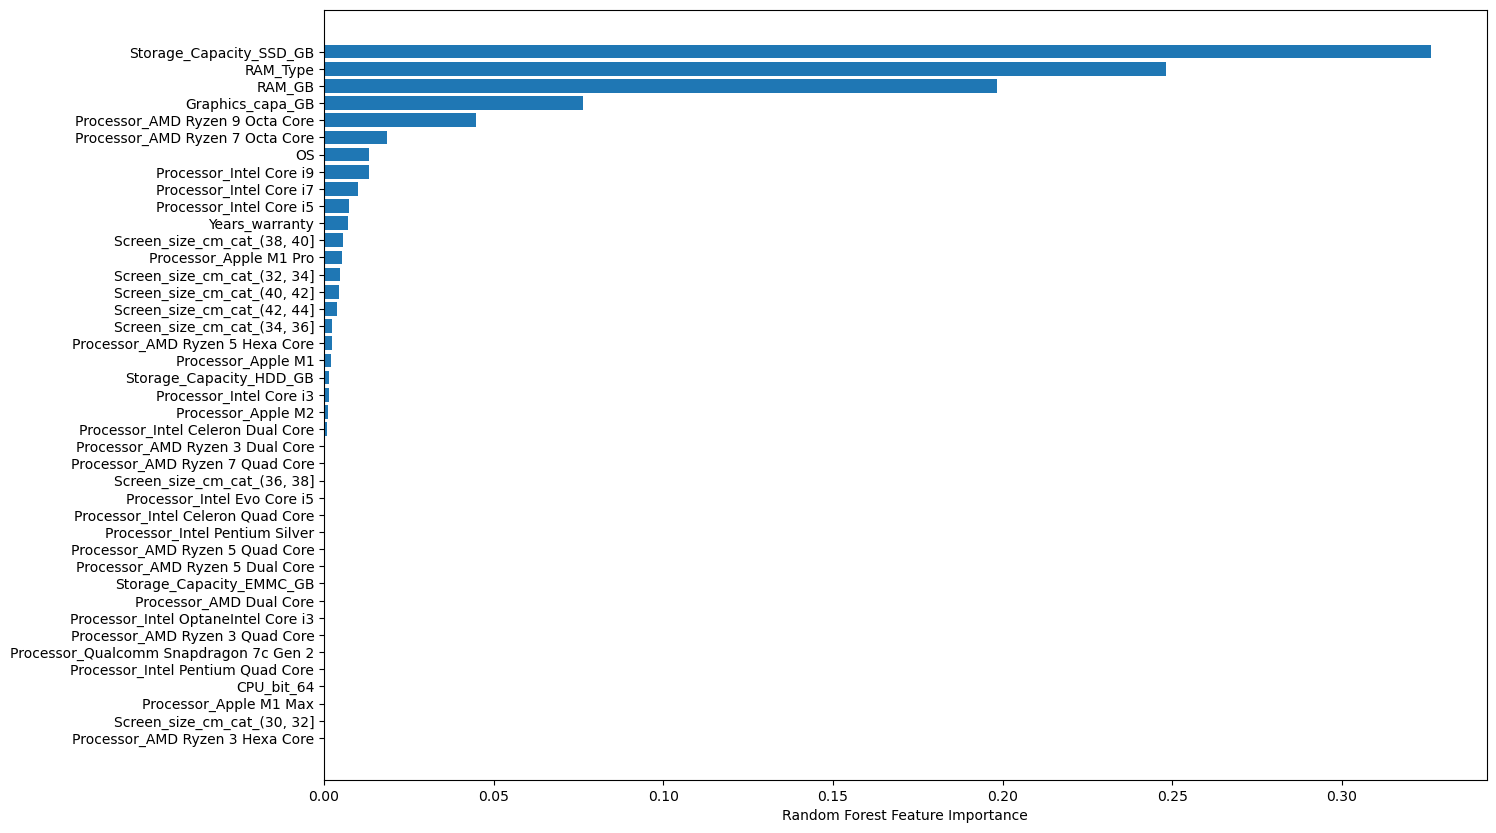

In [147]:
plt.figure(figsize=(15,10))
sorted_idx = rfr_regressor.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfr_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## XG Boost Regressor 

In [48]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [154]:
%%time
xgb1 = XGBRegressor()
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_transformed.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_transformed.columns.values]
X_test_transformed.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_transformed.columns.values]


# target = df.iloc[:, 0]
# predictors = df.iloc[:, 1:]
parameters = {
            'learning_rate': [.01, 0.02,.03,.04], #so called `eta` value
              'max_depth':[*range(10,15)],
              'min_child_weight': [1,2,3],
              'subsample': [0.5,.7,0.8],
              'colsample_bytree': [0.5,.7,.8],
              'n_estimators': [100,110,120,130,140]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=1)

xgb_grid.fit(X_train_transformed,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 2700 candidates, totalling 5400 fits
0.9230828123829284
{'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 140, 'subsample': 0.8}
CPU times: total: 26.3 s
Wall time: 8min 21s


In [155]:
xgb = XGBRegressor(colsample_bytree=0.5, learning_rate=0.04, max_depth= 14, min_child_weight= 1, n_estimators= 140, silent= 0, subsample= 0.8)

In [156]:
model=xgb.fit(X_train_transformed, y_train)
model

[14:52:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=140, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [157]:
y_test_pred = model.predict(X_test_transformed)

In [158]:
y_train_pred = model.predict(X_train_transformed)

In [159]:
print(metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_train_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9829823894556847
0.9816757938895482


In [160]:
print(metrics.r2_score(y_test, y_test_pred))
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test_transformed.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.955722882585777
0.937925217742805


### Exporting the Mode

In [44]:
import pickle 

In [46]:
pickle.dump(df1,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [175]:
model = pickle.load(open('model.pkl', 'rb'))

In [128]:
# df1=pickle.load(open('df.pkl', 'rb'))
# df1.columns